Chaos and Dynamical Systems, Part II: The Three-Body Problem
==========================================

Christopher Tripp | April 2018

Let's start by solving a one-body problem: a small mass $m$ (a planet) moving in the Sun's central gravitational potential $M/r$. 

We assume that the Sun is stationary and acts as the origin of our center-of-mass coordinate system.  Considering only the force of gravity, the equation of motion for the orbiting planet then becomes

$$m \frac{d^2 \mathbf{r}}{dt^2} = - \frac{GMm}{r^3} \mathbf{r}$$

where $\mathbf{r}$ is the vector directed from the Sun to the planet, $M$ is the mass of the Sun, and $m$ is the mass of the planet.  For computational purposes we can express this in cartesian coordinates as:
$$\frac{dx}{dt} = v_x(t)$$

$$\frac{dy}{dt} = v_y(t)$$

$$\frac{dv_x}{dt} = - \frac{GM}{r^3}x$$

$$\frac{dv_y}{dt} = - \frac{GM}{r^3}y$$

where $r^2 = x^2 + y^2$.  Since we have a system of coupled first-order differential equations, we can use RK4 to calculate the trajectories of the orbit.

In [1]:
#python 2
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#take the array of a_i values and return the array of their derivatives, based on the diff eq we're trying to solve
def f_basic_orbit(a, t):  
    #initialize derivative array
    da_dt = np.zeros(len(a))
    
    #a_0 = x
    #a_1 = y
    #a_2 = v_x
    #a_3 = v_y
    
    #d(a_0)/dt = a_2
    da_dt[0] = a[2]
    
    #d(a_1)/dt = a_3
    da_dt[1] = a[3]
    
    #d(a_2)/dt = -(a_0)/(sqrt(a_0^2 + a_1^2)^3)
    da_dt[2] = (-a[0])/((np.sqrt(a[0]**2 + a[1]**2))**3)
    
    #d(a_3)/dt = -(a_1)/(sqrt(a_0^2 + a_1^2)^3)
    da_dt[3] = (-a[1])/((np.sqrt(a[0]**2 + a[1]**2))**3)

    return da_dt

In [3]:
#take an array of our variables a_i at time=t and return array a_i at time=(t+h) using RK4 method
def rungekutta(f, old_vals, t, h):
    k1 = h*(f(old_vals, t))
    k2 = h*(f((old_vals + (0.5*k1)), (t + (0.5*h))))
    k3 = h*(f((old_vals + (0.5*k2)), (t + (0.5*h))))
    k4 = h*(f((old_vals + k3), (t + h)))
    return (old_vals + ((1.0/6.0)*(k1 + (2*k2) + (2*k3) + k4)))

In [4]:
def basic_plot(ind_var, dep_var, style, x_label, y_label, title):
    plt.figure(dpi=100)
    plt.plot(ind_var, dep_var, style)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    #plt.legend()
    plt.title(title)
    plt.show()

In [6]:
def orbit_ode_solver(deriv_func, x_0, y_0, vx_0, vy_0):
    #define the step
    h = 0.01
    
    #define the order of the original diff eq to be solved
    order = 4

    #initial time value
    t_init = 0
    
    #for an initial value problem, initial conditions are given for all the a_i
    a0_init = x_0
    a1_init = y_0
    a2_init = vx_0
    a3_init = vy_0

    #define the extent of the time interval we shall plot
    t_final = 200

    #create and initialize time array
    time_vals = np.arange(t_init, t_final, h)    
    
    #create and initialize a_i array
    a = np.zeros(order)
    a[0] = a0_init
    a[1] = a1_init
    a[2] = a2_init
    a[3] = a3_init
    
    #create an array for the values of a_0, a_1 at each time
    a_0_solutions = np.zeros(len(time_vals))
    a_0_solutions[0] = a0_init #initialize
    a_1_solutions = np.zeros(len(time_vals))
    a_1_solutions[0] = a1_init #initialize
    
    #for each time t, use RK4 to find value of a_i at time=(t+h), then save a_0(t+h) into the array of a_0 values
    for t_n in np.arange(1, len(time_vals), 1):
        a = rungekutta(deriv_func, a, t_n, h)
        a_0_solutions[t_n] = a[0]
        a_1_solutions[t_n] = a[1]

    #plot the orbit around the sun
    plt.figure(dpi=100)
    plt.plot(0, 0, "yo") #plot the position of the sun
    plt.plot(a_0_solutions, a_1_solutions, "r-") #plot the orbit
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis('scaled')
    #plt.legend()
    #plt.title("circular orbit")
    plt.show()

Let's first choose initial conditions that will give us a circular orbit.  For such an orbit, the magnitude of the acceleration is related to the radius by $a = \tfrac{v^2}{r}$.  Plugging this into our equation of motion (and setting $GM = 1$ for simplicity) gives us the following constraint for circular motion:
$$v = \frac{1}{\sqrt{r}}$$
So, if we want to start by setting $x(0) = 4$, $y(0) = 0$, $v_x(0) = 0$, we see that we must have $v_y(0) = 0.5$ to achieve a circular orbit.

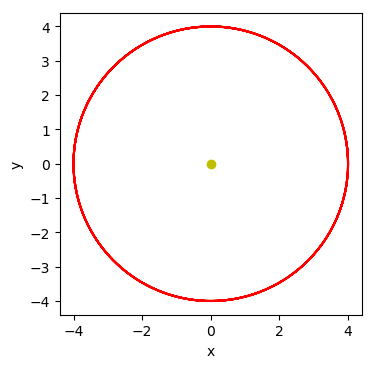

In [11]:
orbit_ode_solver(f_basic_orbit, 4.0, 0.0, 0.0, 0.5)

Now let's try an elliptical orbit.  Set $y(0) = 0$, $v_x(0) = 0$

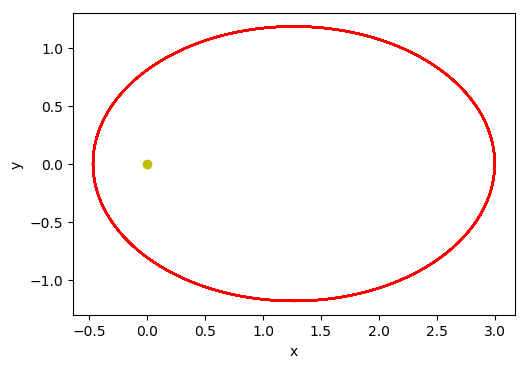

In [12]:
orbit_ode_solver(f_basic_orbit, 3.0, 0.0, 0.0, 0.3)

The Restricted Three-Body Problem:
----------------------
Now let's analyze a "restricted" three-body problem: the motion of an asteroid that is orbiting around Jupiter, subject also to the gravitational attraction of the Sun.  We will assume that Jupiter is in a circular orbit around the Sun, and that the mass of the asteroid is negligible. In other words, the asteroid will move in a gravational potential generated by Jupiter and the Sun.

It turns out that this sort of motion cannot be solved for analytically.  It is therefore a perfect candidate for applying our numerical methods.

Let us work in the rotating coordinate system centered on the center of mass of Jupiter ($M_1$) and the Sun ($M_2$).  Iin this frame, Jupiter and the Sun will sit at the fixed positions

$$ \mathbf{r_1} = \left ( \frac{M_2 R}{M_1 + M_2} , 0, 0 \right )$$

$$ \mathbf{r_2} = \left ( \frac{M_1 R}{M_1 + M_2} , 0, 0 \right )$$

where $R$ is the Jupiter-Sun separation.  We note that our rotating frame has angular velocity equal to that of the Jupiter-Sun system:

$$\Omega =  \sqrt{\frac{G(M_1 + M_2)}{R^3}}$$

The asteroid motion that we shall analyze will be restricted to a plane.  The equation of motion for the position $\mathbf{r} \equiv (x, y, 0)$ of the asteroid is

$$m \mathbf{a} = - \frac{GmM_1}{|\mathbf{r} - \mathbf{r_1}|^3} (\mathbf{r} - \mathbf{r_1}) - \frac{GmM_2}{|\mathbf{r} - \mathbf{r_2}|^3} (\mathbf{r} - \mathbf{r_2}) - 2m \mathbf{\Omega} \times \mathbf{v} - m \mathbf{\Omega} \times (\mathbf{\Omega} \times \mathbf{r})$$

where $\mathbf{\Omega} = \Omega(0, 0, 1)$, and where $\mathbf{v} \equiv (v_x, v_y, 0)$ is the velocity of the asteroid.  The first two terms on the right-hand side are the gravitational attraction of $M_1$ and $M_2$ on the asteroid $m$.  The rightmost terms are the Coriolis force,
$$- 2m \mathbf{\Omega} \times \mathbf{v} \equiv 2m\Omega(v_y, -v_x, 0)$$
and the centrifugal force,
$$- m \mathbf{\Omega} \times (\mathbf{\Omega} \times \mathbf{r}) \equiv m\Omega^2(x, y, 0)$$


In terms of components, the equation of motion becomes:

$$\frac{d^2 x}{dt^2} = - \frac{M_1 G (x - x_1)}{[(x - x_1)^2 + y^2]^{3/2}} - \frac{M_2 G (x - x_2)}{[(x - x_2)^2 + y^2]^{3/2}} + \frac{(M_1 + M_2)G x}{R^3} + 2 \Omega \frac{dy}{dt}$$

$$\frac{d^2 y}{dt^2} = - \frac{M_1 G y}{[(x - x_1)^2 + y^2]^{3/2}} - \frac{M_2 G y}{[(x - x_2)^2 + y^2]^{3/2}} + \frac{(M_1 + M_2)G y}{R^3} - 2 \Omega \frac{dx}{dt}$$

where $x_1$ is the $x$-component of $r_1$ and $x_2$ is the $x$-component of $r_2$.

Lagrange studied this type of system, and determined that in the corotating frame where $M_1$ and $M_2$ are at rest, there are five points of equilibrium for $m$, known as the **Lagrange points** L1 - L5.  In the inertial frame, these points correspond to stationary orbits, where the distance between $m$ and $M_1$ and $M_2$ stays constant at all times.  In the corotating frame that we are studying, the points L1, L2, and L3 sit along the line that joins $M_1$ and $M_2$; these points are **unstable**, meaning that if the asteroid starts there it will gradually veer off.  On the other hand, L4 and L5, which sit approimately along the orbit of $M_1$, are **stable** points.  

Let's plot some of these by adapting the RK4 routine that we have used previously.

In [118]:
#take the array of a_i values and return the array of their derivatives, based on the diff eq we're trying to solve
def f_three_body_restric_orbit(a, t, r1, r2, omega): 
    
    #constants
    G = (6.6742 * 10**(-11)) #gravitational constant (m^3 kg^-1 s^-2)
    M1 = (1.899 * 10**(27)) #mass of the Sun (kg)
    M2 = (1.989 * 10**(30)) #mass of Jupiter (kg)
    R = (778.3 * 10**(9)) #semi major axis of Jupiter's orbit (m)
    Tj = (3.743 * 10**(8)) #period of Jupiter's orbit (seconds)
       
    #initialize derivative array
    da_dt = np.zeros(len(a))
    
    #a_0 = x
    #a_1 = y
    #a_2 = v_x
    #a_3 = v_y
    
    #d(a_0)/dt = a_2
    da_dt[0] = a[2]
    
    #d(a_1)/dt = a_3
    da_dt[1] = a[3]
    
    #d(a_0)/dt = dx/dt
    da_dt[2] = ((-(M1 * G * (a[0] - r1[0]))/(((a[0] - r1[0])**2.0 + (a[1])**2.0)**(3.0/2.0))) - ((M2 * G * (a[0] - r2[0]))/(((a[0] - r2[0])**2.0 + (a[1])**2.0)**(3.0/2.0))) + (((M1 + M2) * G * a[0])/(R**3.0)) + (2.0 * omega * a[3]))
    
    #d(a_1)/dt = dy/dt
    da_dt[3] = ((-(M1 * G * a[1])/(((a[0] - r1[0])**2.0 + (a[1])**2.0)**(3.0/2.0))) - ((M2 * G * a[1])/(((a[0] - r2[0])**2.0 + (a[1])**2.0)**(3.0/2.0))) + (((M1 + M2) * G * a[1])/(R**3.0)) - (2.0 * omega * a[2]))

    return da_dt

In [119]:
#take an array of our variables a_i at time=t and return array a_i at time=(t+h) using RK4 method
def rungekutta_threebody(f, old_vals, t, h, r1, r2, omega):
    k1 = h*(f(old_vals, t, r1, r2, omega))
    k2 = h*(f((old_vals + (0.5*k1)), (t + (0.5*h)), r1, r2, omega))
    k3 = h*(f((old_vals + (0.5*k2)), (t + (0.5*h)), r1, r2, omega))
    k4 = h*(f((old_vals + k3), (t + h), r1, r2, omega))
    return (old_vals + ((1.0/6.0)*(k1 + (2*k2) + (2*k3) + k4)))

In [126]:
def three_body_orbit_ode_solver(deriv_func, x_0, y_0, vx_0, vy_0):
    
    #constants
    G = (6.6742 * 10**(-11)) #gravitational constant (m^3 kg^-1 s^-2)
    M1 = (1.899 * 10**(27)) #mass of the Sun (kg)
    M2 = (1.989 * 10**(30)) #mass of Jupiter (kg)
    R = (778.3 * 10**(9)) #semi major axis of Jupiter's orbit (m)
    Tj = (3.743 * 10**(8)) #period of Jupiter's orbit (seconds)
    omega = np.sqrt((G*(M1 + M2))/(R**3))
    
    #Jupiter's "fixed" position in our frame
    r1 = np.zeros(3)
    r1[0] = ((M2 * R)/(M1 + M2))
    
    #the Sun's "fixed" position in our frame
    r2 = np.zeros(3)
    r2[0] = ((M1 * R)/(M1 + M2))
    
    #define the step
    h = 1000
    
    #define the order of the original diff eq to be solved
    order = 4

    #initial time value
    t_init = 0
    
    #for an initial value problem, initial conditions are given for all the a_i
    a0_init = x_0
    a1_init = y_0
    a2_init = vx_0
    a3_init = vy_0

    #define the extent of the time interval we shall plot
    t_final = 65 * 10**8

    #create and initialize time array
    time_vals = np.arange(t_init, t_final, h)    
    
    #create and initialize a_i array
    a = np.zeros(order)
    a[0] = a0_init
    a[1] = a1_init
    a[2] = a2_init
    a[3] = a3_init
    
    #create an array for the values of a_0, a_1 at each time
    a_0_solutions = np.zeros(len(time_vals))
    a_0_solutions[0] = a0_init #initialize
    a_1_solutions = np.zeros(len(time_vals))
    a_1_solutions[0] = a1_init #initialize
    
    #for each time t, use RK4 to find value of a_i at time=(t+h), then save a_0(t+h) into the array of a_0 values
    for t_n in np.arange(1, len(time_vals), 1):
        a = rungekutta_threebody(deriv_func, a, t_n, h, r1, r2, omega)
        a_0_solutions[t_n] = a[0]
        a_1_solutions[t_n] = a[1]    
        
    #make 3D plot of orbit
    fig = plt.figure(dpi=100)
    ax = plt.axes(projection='3d')
    ax.plot([r1[0]], [0.], [0.], markerfacecolor='r', markeredgecolor='r', marker='o', markersize=5, alpha=0.6) #plot Jupiter
    ax.plot([r2[0]], [0.], [0.], markerfacecolor='y', markeredgecolor='y', marker='o', markersize=5, alpha=0.6) #plot Sun
    ax.plot3D(a_0_solutions, a_1_solutions, 0, 'b-', linewidth=0.8) #plot the asteroid's path
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()

Let's first demonstrate the stability of the L4 and L5 points.  It has been shown that if we put the asteroid in an initial resting position at

$$r_{\text{i}} = R \left ( \frac{M_2 - M_1}{M_1 + M_2} \cos \alpha, \sin \alpha, 0   \right ) $$

where L4 and L5 correspond to $\alpha = \pm \pi / 3$ then we will see small oscillations around these two Lagrange points.

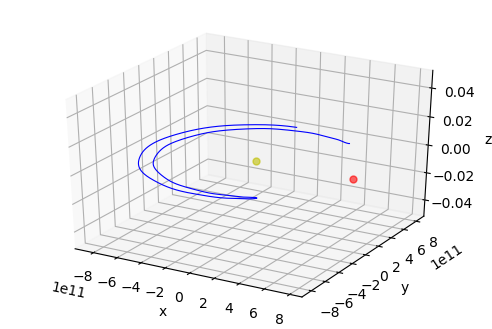

In [127]:
#constants
R = (778.3 * 10**(9)) #semi major axis of Jupiter's orbit (m)
G = (6.6742 * 10**(-11)) #gravitational constant (m^3 kg^-1 s^-2)
M1 = (1.899 * 10**(27)) #mass of the Sun (kg)
M2 = (1.989 * 10**(30)) #mass of Jupiter (kg)

#initial conditions to observe stability at L4 and L5
x_0_stable = R*((M2 - M1)/(M1 + M2))*np.cos(np.pi/3.0)
y_0_stable = R*np.sin(np.pi/3.0)

#plot the orbit
three_body_orbit_ode_solver(f_three_body_restric_orbit, x_0_stable, y_0_stable, 0.0, 0.0)

We see here the stability of the orbit.

Now let's alter the starting position in a way that will result in an unstable orbit.

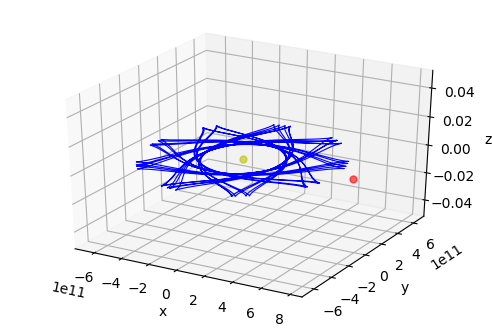

In [128]:
x_0_star = R*((M2 - M1)/(M1 + M2))*np.cos(np.pi/3.0)
y_0_star = R*np.sin(np.pi/1.3)

three_body_orbit_ode_solver(f_three_body_restric_orbit, x_0_star, y_0_star, 0.0, 0.0)


Sources:

https://web.northeastern.edu/afeiguin/p4840/p131spring04/node19.html

http://pmaweb.caltech.edu/~physlab/lab_22_current/Ph22_1_ODEs.pdf

http://www.appstate.edu/~grayro/comphys/projects.pdf